<a href="https://colab.research.google.com/github/mhtasnia/DS422/blob/main/Drug_Addiction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Bangladeshi_Drug_Use_Dataset.csv')

In [6]:
df.head()

,Age,Gender,Education (last/ongoing),With whom do you live?,What is your thinking about drug?,With whom do you spend most of your times?,Did you ever fail in your life?,Do you get suicidal thoughts?,How is your family relationship?,What is the financial condition of your family?,...,Have you ever taken drug?,What is the name of the drug you used for the 1st time?,At what age you used drugs for the 1st time?,How often do you use drugs?,What drug do you use currently?,In what occasions do you use drugs?,"If you have a chance, will you taste drug?",Is it easy to control the use of drug?,Why did you start using drugs?,Do you feel guilty after taking drugs?
0,21.0,Male,Undergraduate,Family,"Disease, should avoid",Family/Relatives,Yes,No,Very good,Medium,...,No,Never taken,No,"No, I do not",No drug,Do not use,No,Yes,Teenagers curiosity,NaN
1,22.0,Male,Undergraduate,Hall/Hostel,Should avoid,Alone,Yes,No,Satisfactory,Medium,...,No,Never taken,Never,"No, I do not",No drug,Do not use,No,No,NaN,NaN
2,21.0,Male,Undergraduate,Family,"Disease, should avoid",Family/Relatives,Yes,No,Very good,Medium,...,No,Never taken,No,"No, I do not",No drug,Do not use,No,Yes,"Teenagers curiosity, Failure in love, Emotiona...",Yes
3,22.0,Male,Undergraduate,Family,Should avoid,Friends,Yes,Yes,Very good,Medium,...,No,Never taken,NaN,"No, I do not",No drug,Do not use,No,Yes,NaN,NaN
4,23.0,Male,Undergraduate,Hall/Hostel,"Social trend, should avoid",Alone,No,No,Very good,Medium,...,No,Never taken,NaN,"No, I do not",No drug,Do not use,No,Yes,NaN,NaN


In [7]:
df.shape

(1624, 26)

In [8]:
new_column_names = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Education (last/ongoing)': 'Education',
    'With whom do you live?': 'Living Situation',
    'What is your thinking about drug?': 'Attitude Towards Drugs',
    'With whom do you spend most of your times?': 'Social Connections',
    'Did you ever fail in your life?': 'Past Failures',
    'Do you get suicidal thoughts?': 'Suicidal Thoughts',
    'How is your family relationship?': 'Family Relationships',
    'What is the financial condition of your family?': 'Family Finances',
    'How many addicted friends do you have?': 'Addicted Friends',
    'Do you have any addicted person in your family?': 'Family Addiction',
    'Are you satisfied with your workplace?': 'Workplace Satisfaction',
    'Do you have any case running at court or police station?': 'Legal Cases',
    'Do you live with any drug user?': 'Living with Drug User',
    'What can be the factors for using drug?': 'Drug Use Factors',
    'Have you ever taken drug?': 'Past Drug Use',
    'What is the name of the drug you used for the 1st time?': 'First Drug Name',
    'At what age you used drugs for the 1st time?': 'First Drug Age',
    'How often do you use drugs?': 'Frequency of Drug Use',
    'What drug do you use currently?': 'Current Drug Use',
    'In what occasions do you use drugs?': 'Occasions for Drug Use',
    'If you have a chance, will you taste drug?': 'Willingness to Try Drugs',
    'Is it easy to control the use of drug?': 'Drug Control',
    'Why did you start using drugs?': 'Reasons for Starting',
    'Do you feel guilty after taking drugs?': 'Guilt After Drug Use'
}

df.rename(columns=new_column_names, inplace=True)

df.head()

,Age,Gender,Education,Living Situation,Attitude Towards Drugs,Social Connections,Past Failures,Suicidal Thoughts,Family Relationships,Family Finances,...,Past Drug Use,First Drug Name,First Drug Age,Frequency of Drug Use,Current Drug Use,Occasions for Drug Use,Willingness to Try Drugs,Drug Control,Reasons for Starting,Guilt After Drug Use
0,21.0,Male,Undergraduate,Family,"Disease, should avoid",Family/Relatives,Yes,No,Very good,Medium,...,No,Never taken,No,"No, I do not",No drug,Do not use,No,Yes,Teenagers curiosity,NaN
1,22.0,Male,Undergraduate,Hall/Hostel,Should avoid,Alone,Yes,No,Satisfactory,Medium,...,No,Never taken,Never,"No, I do not",No drug,Do not use,No,No,NaN,NaN
2,21.0,Male,Undergraduate,Family,"Disease, should avoid",Family/Relatives,Yes,No,Very good,Medium,...,No,Never taken,No,"No, I do not",No drug,Do not use,No,Yes,"Teenagers curiosity, Failure in love, Emotiona...",Yes
3,22.0,Male,Undergraduate,Family,Should avoid,Friends,Yes,Yes,Very good,Medium,...,No,Never taken,NaN,"No, I do not",No drug,Do not use,No,Yes,NaN,NaN
4,23.0,Male,Undergraduate,Hall/Hostel,"Social trend, should avoid",Alone,No,No,Very good,Medium,...,No,Never taken,NaN,"No, I do not",No drug,Do not use,No,Yes,NaN,NaN


In [9]:
df.isnull().sum()

,0
Age,71
Gender,0
Education,24
Living Situation,0
Attitude Towards Drugs,0
Social Connections,0
Past Failures,24
Suicidal Thoughts,0
Family Relationships,23
Family Finances,0


<Axes: >

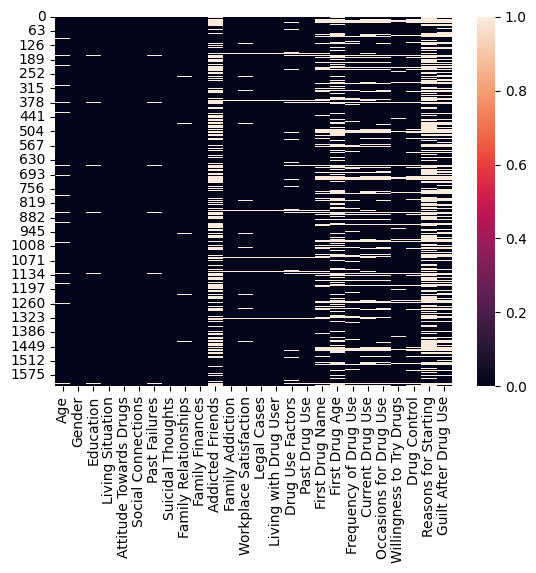

In [10]:
sns.heatmap(df.isnull())

In [11]:

import math
modeTestScore1=(df['Age'].mode()[0])
modeTestScore2=(df['Education'].mode()[0])
modeTestScore3=(df['Past Failures'].mode()[0])
modeTestScore4=(df['Family Relationships'].mode()[0])
modeTestScore5=(df['Addicted Friends'].mode()[0])
modeTestScore6=(df['Family Addiction'].mode()[0])
modeTestScore7=(df['Workplace Satisfaction'].mode()[0])
modeTestScore8=(df['Legal Cases'].mode()[0])
modeTestScore9=(df['Living with Drug User'].mode()[0])
modeTestScore10=(df['Drug Use Factors'].mode()[0])
modeTestScore11=(df['Past Drug Use'].mode()[0])
modeTestScore12=(df['First Drug Name'].mode()[0])
modeTestScore13=(df['First Drug Age'].mode()[0])
modeTestScore14=(df['Frequency of Drug Use'].mode()[0])
modeTestScore15=(df['Current Drug Use'].mode()[0])
modeTestScore16=(df['Occasions for Drug Use'].mode()[0])
modeTestScore17=(df['Willingness to Try Drugs'].mode()[0])
modeTestScore18=(df['Drug Control'].mode()[0])
modeTestScore19=(df['Reasons for Starting'].mode()[0])
modeTestScore20=(df['Guilt After Drug Use'].mode()[0])


df['Age']=df['Age'].fillna(modeTestScore1)
df['Education']=df['Education'].fillna(modeTestScore2)
df['Past Failures']=df['Past Failures'].fillna(modeTestScore3)
df['Family Relationships']=df['Family Relationships'].fillna(modeTestScore4)
df['Addicted Friends']=df['Addicted Friends'].fillna(modeTestScore5)
df['Family Addiction']=df['Family Addiction'].fillna(modeTestScore6)
df['Workplace Satisfaction']=df['Workplace Satisfaction'].fillna(modeTestScore7)
df['Legal Cases']=df['Legal Cases'].fillna(modeTestScore8)
df['Living with Drug User']=df['Living with Drug User'].fillna(modeTestScore9)
df['Drug Use Factors']=df['Drug Use Factors'].fillna(modeTestScore10)
df['Past Drug Use']=df['Past Drug Use'].fillna(modeTestScore11)
df['First Drug Name']=df['First Drug Name'].fillna(modeTestScore12)
df['First Drug Age']=df['First Drug Age'].fillna(modeTestScore13)
df['Frequency of Drug Use']=df['Frequency of Drug Use'].fillna(modeTestScore14)
df['Current Drug Use']=df['Current Drug Use'].fillna(modeTestScore15)
df['Occasions for Drug Use']=df['Occasions for Drug Use'].fillna(modeTestScore16)
df['Willingness to Try Drugs']=df['Willingness to Try Drugs'].fillna(modeTestScore17)
df['Drug Control']=df['Drug Control'].fillna(modeTestScore18)
df['Reasons for Starting']=df['Reasons for Starting'].fillna(modeTestScore19)
df['Guilt After Drug Use']=df['Guilt After Drug Use'].fillna(modeTestScore20)

In [12]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Living Situation,0
Attitude Towards Drugs,0
Social Connections,0
Past Failures,0
Suicidal Thoughts,0
Family Relationships,0
Family Finances,0


<Axes: >

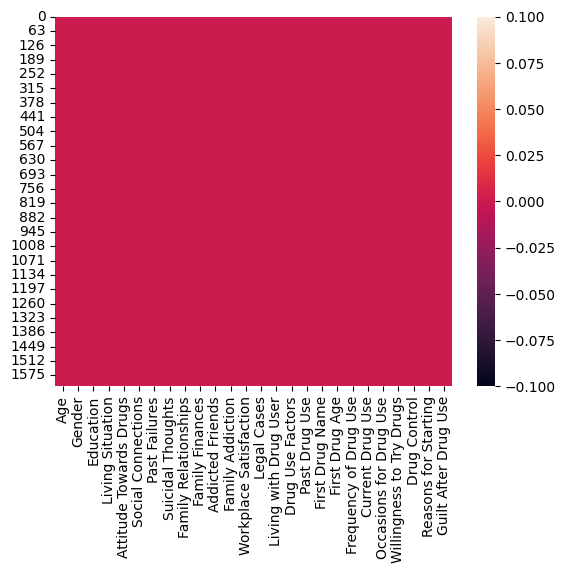

In [13]:
sns.heatmap(df.isnull())

In [14]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [
    'Gender', 'Education', 'Living Situation', 'Attitude Towards Drugs',
    'Social Connections', 'Past Failures', 'Suicidal Thoughts',
    'Family Relationships', 'Family Finances', 'Addicted Friends',
    'Family Addiction', 'Workplace Satisfaction', 'Legal Cases',
    'Living with Drug User', 'Drug Use Factors', 'Past Drug Use',
    'First Drug Name', 'First Drug Age', 'Frequency of Drug Use',
    'Current Drug Use', 'Occasions for Drug Use', 'Willingness to Try Drugs',
    'Drug Control', 'Reasons for Starting', 'Guilt After Drug Use'
]

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,Gender,Education,Living Situation,Attitude Towards Drugs,Social Connections,Past Failures,Suicidal Thoughts,Family Relationships,Family Finances,...,Past Drug Use,First Drug Name,First Drug Age,Frequency of Drug Use,Current Drug Use,Occasions for Drug Use,Willingness to Try Drugs,Drug Control,Reasons for Starting,Guilt After Drug Use
0,21.0,1,3,1,0,1,1,0,3,0,...,0,3,15,1,5,6,1,1,11,2
1,22.0,1,3,3,2,0,1,0,2,0,...,0,3,11,1,5,6,1,0,1,2
2,21.0,1,3,1,0,1,1,0,3,0,...,0,3,15,1,5,6,1,1,12,2
3,22.0,1,3,1,2,2,1,1,3,0,...,0,3,3,1,5,6,1,1,1,2
4,23.0,1,3,3,4,0,0,0,3,0,...,0,3,3,1,5,6,1,1,1,2


# **DATA ANALYSIS**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1624 non-null   float64
 1   Gender                    1624 non-null   int64  
 2   Education                 1624 non-null   int64  
 3   Living Situation          1624 non-null   int64  
 4   Attitude Towards Drugs    1624 non-null   int64  
 5   Social Connections        1624 non-null   int64  
 6   Past Failures             1624 non-null   int64  
 7   Suicidal Thoughts         1624 non-null   int64  
 8   Family Relationships      1624 non-null   int64  
 9   Family Finances           1624 non-null   int64  
 10  Addicted Friends          1624 non-null   int64  
 11  Family Addiction          1624 non-null   int64  
 12  Workplace Satisfaction    1624 non-null   int64  
 13  Legal Cases               1624 non-null   int64  
 14  Living w

In [16]:
df.describe()

,Age,Gender,Education,Living Situation,Attitude Towards Drugs,Social Connections,Past Failures,Suicidal Thoughts,Family Relationships,Family Finances,...,Past Drug Use,First Drug Name,First Drug Age,Frequency of Drug Use,Current Drug Use,Occasions for Drug Use,Willingness to Try Drugs,Drug Control,Reasons for Starting,Guilt After Drug Use
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,...,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,22.185961,0.840517,2.780788,1.837438,2.133005,1.011700,0.796798,0.276478,2.479680,0.174261,...,0.261084,1.709360,5.169951,1.229680,3.451970,6.009236,1.044951,0.608990,3.447044,1.680419
std,1.859157,0.403080,0.702061,1.044625,1.314704,0.789166,0.402506,0.447394,0.892679,0.481119,...,0.439361,1.080499,4.315863,0.866765,2.313167,2.052133,0.492531,0.488127,4.319456,0.625568
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000,2.000000
50%,22.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,2.000000
75%,23.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,...,1.000000,3.000000,7.000000,1.000000,5.000000,6.000000,1.000000,1.000000,3.000000,2.000000
max,28.000000,2.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,3.000000,2.000000,...,1.000000,4.000000,17.000000,5.000000,7.000000,9.000000,2.000000,1.000000,16.000000,2.000000


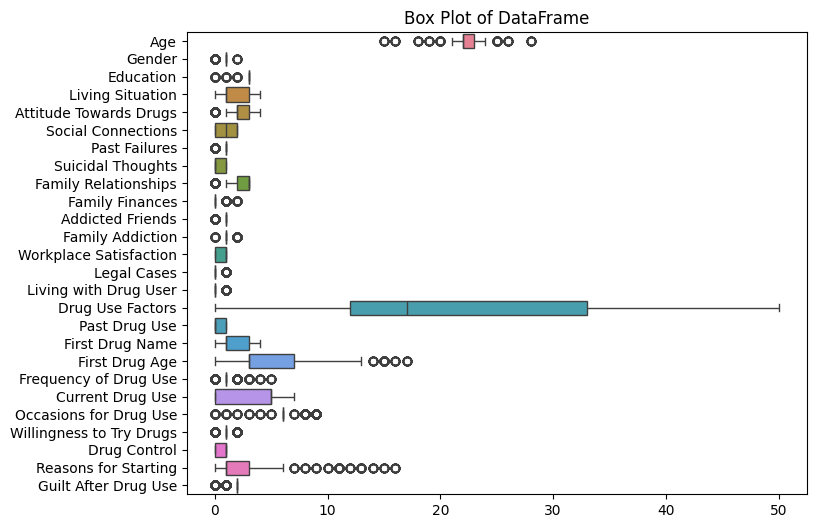

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of DataFrame")
plt.show()

In [24]:
# prompt: drop timestamp

# df.drop(columns=["Timestamp"], inplace=True)

In [25]:
df.corr()

,Age,Gender,Education,Living Situation,Attitude Towards Drugs,Social Connections,Past Failures,Suicidal Thoughts,Family Relationships,Family Finances,...,Past Drug Use,First Drug Name,First Drug Age,Frequency of Drug Use,Current Drug Use,Occasions for Drug Use,Willingness to Try Drugs,Drug Control,Reasons for Starting,Guilt After Drug Use
Age,1.000000,0.229527,0.334309,-0.117354,0.154230,0.175735,0.034884,-0.008516,0.222803,0.027810,...,0.185673,-0.149749,-0.049784,-0.130521,-0.202083,-0.000612,0.052770,0.255340,0.046265,0.080798
Gender,0.229527,1.000000,-0.073540,0.112522,-0.180858,0.186007,0.160910,-0.319089,0.130545,-0.082182,...,0.151762,-0.141861,0.032945,0.147234,-0.185651,0.091167,-0.035249,-0.101060,0.224287,-0.143610
Education,0.334309,-0.073540,1.000000,-0.026777,0.030273,0.088038,-0.105400,-0.042320,-0.041522,-0.061953,...,-0.006101,0.128765,-0.044838,0.061527,0.113024,-0.016556,-0.019596,0.174041,0.040463,0.168671
Living Situation,-0.117354,0.112522,-0.026777,1.000000,-0.061861,-0.016377,0.199811,-0.216223,-0.057064,-0.091939,...,0.028092,-0.118308,0.033464,0.275349,-0.024907,0.034041,-0.013332,0.166477,-0.032769,-0.035234
Attitude Towards Drugs,0.154230,-0.180858,0.030273,-0.061861,1.000000,-0.057324,-0.167792,0.211894,-0.051246,0.083148,...,0.243848,-0.213930,-0.091075,0.059687,-0.237780,-0.082214,0.187727,-0.011081,-0.044437,-0.249451
Social Connections,0.175735,0.186007,0.088038,-0.016377,-0.057324,1.000000,-0.039065,-0.134815,0.154707,0.108222,...,0.154671,0.043732,-0.150372,0.102359,-0.135883,0.124724,-0.151946,0.015082,0.104747,0.038780
Past Failures,0.034884,0.160910,-0.105400,0.199811,-0.167792,-0.039065,1.000000,0.069244,-0.009784,0.109788,...,0.132944,-0.033876,-0.114179,0.132092,-0.131591,0.002274,0.117586,0.037528,0.073545,-0.023153
Suicidal Thoughts,-0.008516,-0.319089,-0.042320,-0.216223,0.211894,-0.134815,0.069244,1.000000,-0.256677,0.119527,...,0.149746,0.014655,-0.167306,-0.089178,0.104228,0.090499,0.074984,-0.035088,0.001364,0.007688
Family Relationships,0.222803,0.130545,-0.041522,-0.057064,-0.051246,0.154707,-0.009784,-0.256677,1.000000,0.041963,...,0.054380,0.097997,0.079101,-0.065235,-0.168017,0.023815,-0.012636,0.060232,0.096955,-0.043081
Family Finances,0.027810,-0.082182,-0.061953,-0.091939,0.083148,0.108222,0.109788,0.119527,0.041963,1.000000,...,0.134411,0.039411,-0.027031,-0.202417,-0.048115,-0.197585,0.091730,-0.079611,0.115180,-0.105549


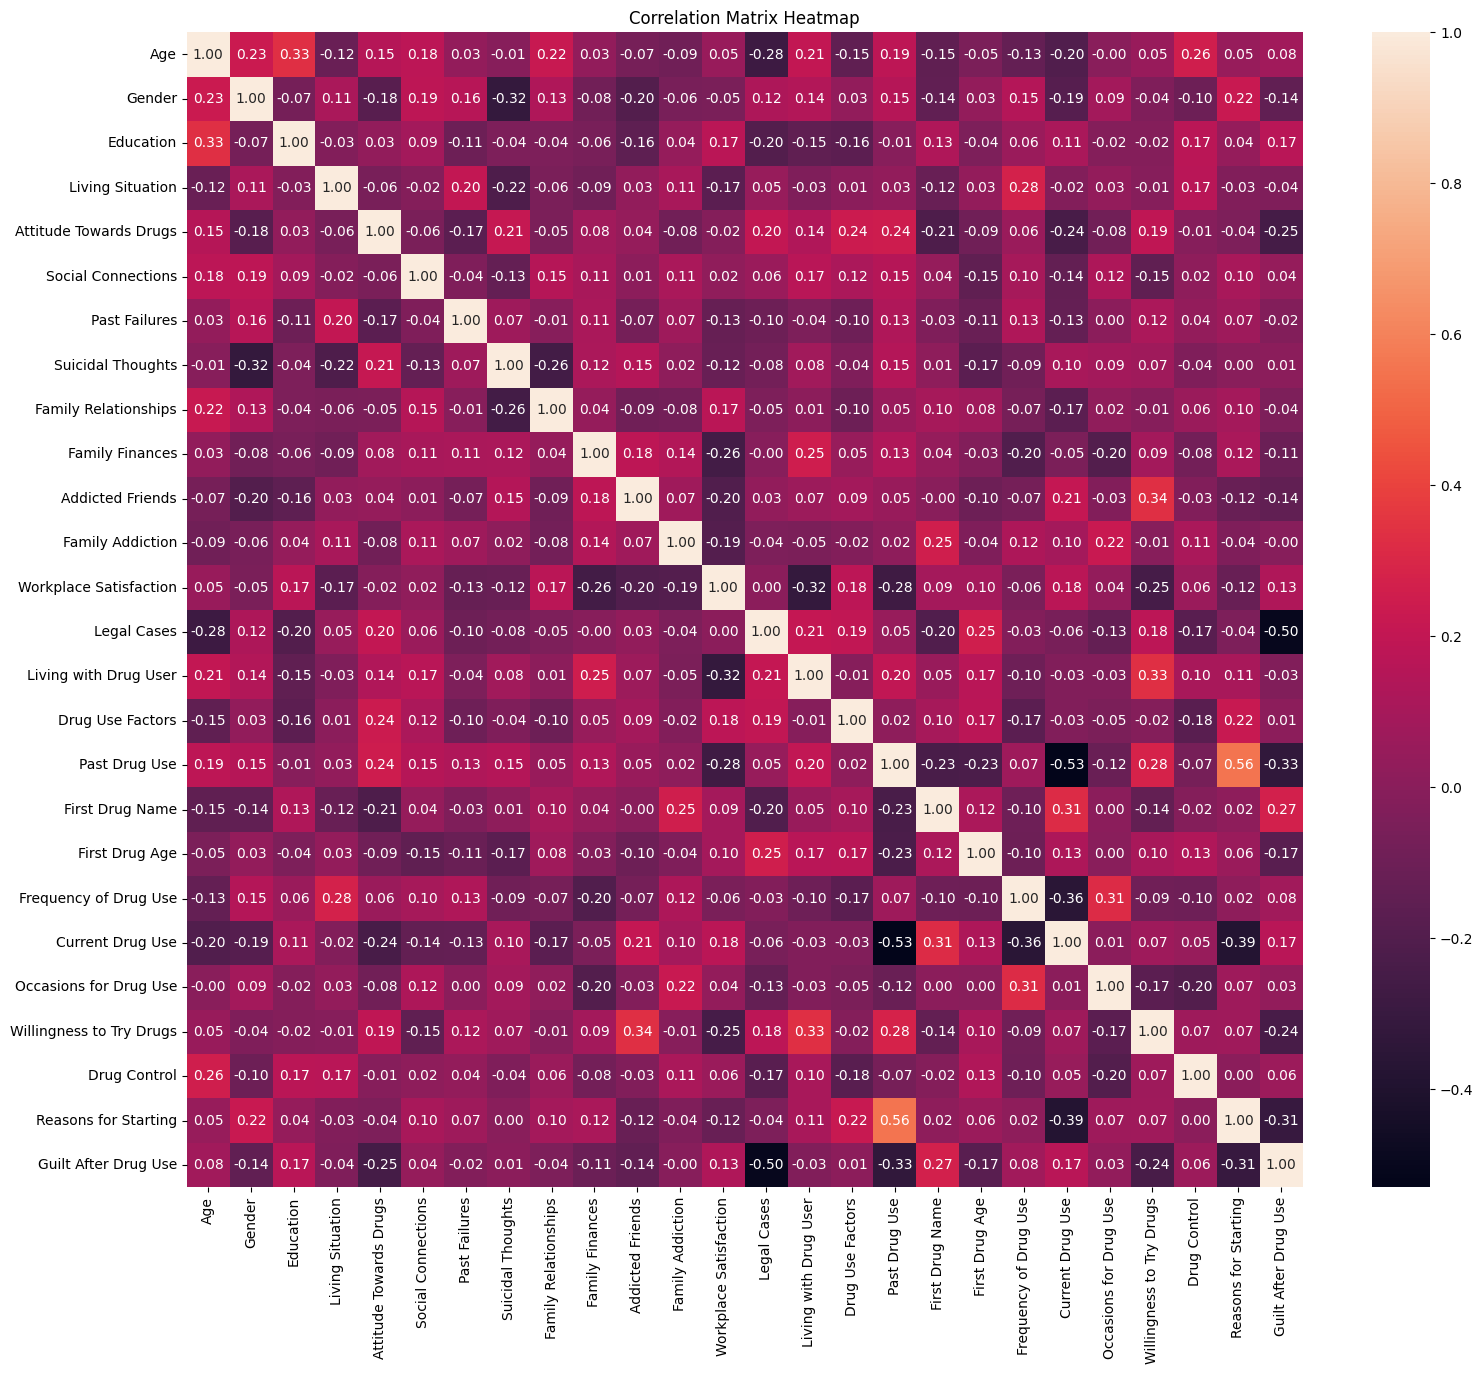

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# **DATA SPLITING**

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

X_numeric = df[numeric_columns].drop(columns=['Past Drug Use'])
y = df['Past Drug Use']

selector = SelectKBest(score_func=chi2, k=5)

X_numeric_new = selector.fit_transform(X_numeric, y)

selected_indices = selector.get_support(indices=True)

selected_features = X_numeric.columns[selected_indices]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Attitude Towards Drugs', 'First Drug Name', 'First Drug Age',
       'Current Drug Use', 'Reasons for Starting'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_numeric_new, y, test_size=0.2, random_state=42)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)


Training data shape (X_train, y_train): (1299, 5) (1299,)
Testing data shape (X_test, y_test): (325, 5) (325,)


**NAIVE_BAYES** **MODEL**

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8215384615384616


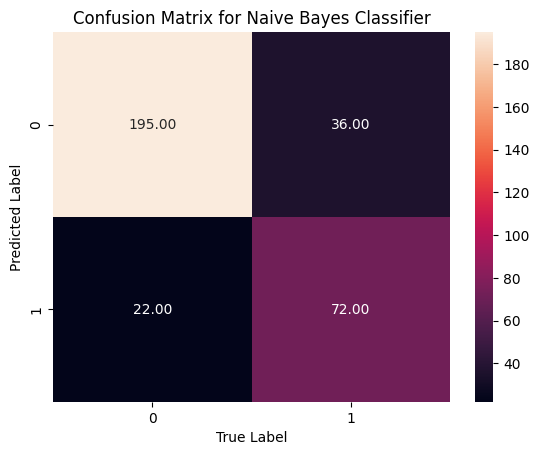

In [30]:
from sklearn.metrics import confusion_matrix
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       231
           1       0.67      0.77      0.71        94

    accuracy                           0.82       325
   macro avg       0.78      0.81      0.79       325
weighted avg       0.83      0.82      0.82       325



**DECESSION** **TREE**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9815384615384616
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       231
           1       0.94      1.00      0.97        94

    accuracy                           0.98       325
   macro avg       0.97      0.99      0.98       325
weighted avg       0.98      0.98      0.98       325



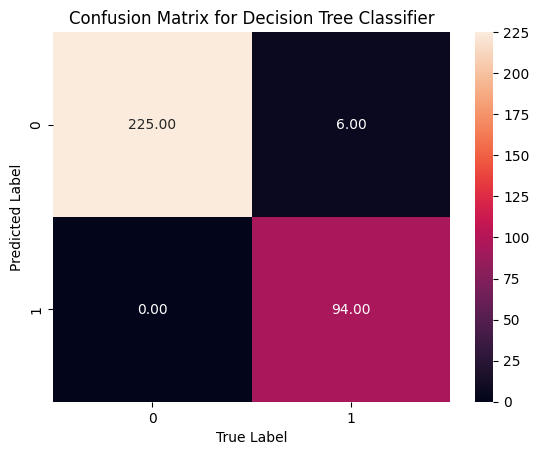

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [34]:
# Define question options
questions = {
    'Attitude Towards Drugs': {
        'question': "What is your thinking about drug?",
        'options': [
            "Should avoid",
            "Social trend",
            "Social trend, should avoid",
            "Disease, should avoid",
            "Disease, social trend"
        ]
    },
    'First Drug Name': {
        'question': "What is the name of the drug you used for the 1st time?",
        'options': [
            "Cigarette",
            "Alcohol",
            "Weed",
            "Phensedyl",
            "LSD",
            "Heroin",
            "Cocaine",
            "Opium",
            "Yaba",
            "Prescription drugs without a prescription",
            "Never taken",
            "Others"
        ]
    },
    'First Drug Age': {
        'question': "At what age you used drugs for the 1st time? (Enter 0 if never)",
        'type': 'number'
    },
    'Current Drug Use': {
        'question': "What drug do you use currently?",
        'options': [
            "Cigarette",
            "Alcohol",
            "Weed",
            "Phensedyl",
            "LSD",
            "Heroin",
            "Cocaine",
            "Opium",
            "Yaba",
            "Prescription drugs without a prescription",
            "Never taken",
            "Others"
        ]
    },
    'Reasons for Starting': {
        'question': "Why did you start using drugs?",
        'options': [
            "Teenagers curiosity",
            "Joy-seeking",
            "Positive attitude toward drug abuse",
            "Low self-confidence",
            "Parents' divorce",
            "To eliminate shyness",
            "Crowded family",
            "Having strict parents",
            "Friends offer",
            "Access to drugs",
            "Low cost of drugs",
            "Peer pressure",
            "Stress relief",
            "Failure in love",
            "Emotionally hurt by others"
        ]
    }
}


In [35]:
def get_user_input():
    responses = {}

    print("\nDRUG USE PREDICTION QUESTIONNAIRE")
    print("---------------------------------")

    for feature, data in questions.items():
        print(f"\n{data['question']}")

        if 'options' in data:
            for i, option in enumerate(data['options'], 1):
                print(f"{i}. {option}")

            while True:
                try:
                    choice = int(input("Enter your choice (number): "))
                    if 1 <= choice <= len(data['options']):
                        responses[feature] = data['options'][choice-1]
                        break
                    else:
                        print(f"Please enter a number between 1 and {len(data['options'])}")
                except ValueError:
                    print("Please enter a valid number")
        else:
            while True:
                try:
                    age = int(input("Enter age: "))
                    responses[feature] = age
                    break
                except ValueError:
                    print("Please enter a valid number")

    return responses


In [36]:
def preprocess_input(user_responses):
    # Convert responses to numerical values using label encoders
    processed = {}

    # Attitude Towards Drugs
    attitude_map = {v:i for i,v in enumerate(questions['Attitude Towards Drugs']['options'])}
    processed['Attitude Towards Drugs'] = attitude_map[user_responses['Attitude Towards Drugs']]

    # First Drug Name and Current Drug Use share same mapping
    drug_map = {v:i for i,v in enumerate(questions['First Drug Name']['options'])}
    processed['First Drug Name'] = drug_map[user_responses['First Drug Name']]
    processed['Current Drug Use'] = drug_map[user_responses['Current Drug Use']]

    # First Drug Age (already numerical)
    processed['First Drug Age'] = user_responses['First Drug Age']

    # Reasons for Starting
    reasons_map = {v:i for i,v in enumerate(questions['Reasons for Starting']['options'])}
    processed['Reasons for Starting'] = reasons_map[user_responses['Reasons for Starting']]

    # Convert to DataFrame in correct feature order
    input_df = pd.DataFrame([processed], columns=selected_features)
    return input_df


In [37]:
def predict_drug_use():
    # Get user responses
    user_responses = get_user_input()

    # Preprocess input
    input_data = preprocess_input(user_responses)

    # Make prediction
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)[0]

    # Convert to human-readable output
    result = "Yes" if prediction[0] == 1 else "No"
    confidence = probability[prediction[0]] * 100

    # Display results
    print("\nPREDICTION RESULTS")
    print("------------------")
    print(f"Predicted Past Drug Use: {result}")
    print(f"Confidence: {confidence:.1f}%")

    # Show interpretation
    print("\nINTERPRETATION")
    if result == "Yes":
        print("The model predicts this person HAS used drugs in the past.")
    else:
        print("The model predicts this person has NOT used drugs in the past.")

In [38]:
# Run the prediction
predict_drug_use()


DRUG USE PREDICTION QUESTIONNAIRE
---------------------------------

What is your thinking about drug?
1. Should avoid
2. Social trend
3. Social trend, should avoid
4. Disease, should avoid
5. Disease, social trend
Enter your choice (number): 4

What is the name of the drug you used for the 1st time?
1. Cigarette
2. Alcohol
3. Weed
4. Phensedyl
5. LSD
6. Heroin
7. Cocaine
8. Opium
9. Yaba
10. Prescription drugs without a prescription
11. Never taken
12. Others
Enter your choice (number): 2

At what age you used drugs for the 1st time? (Enter 0 if never)
Enter age: 0

What drug do you use currently?
1. Cigarette
2. Alcohol
3. Weed
4. Phensedyl
5. LSD
6. Heroin
7. Cocaine
8. Opium
9. Yaba
10. Prescription drugs without a prescription
11. Never taken
12. Others
Enter your choice (number): 11

Why did you start using drugs?
1. Teenagers curiosity
2. Joy-seeking
3. Positive attitude toward drug abuse
4. Low self-confidence
5. Parents' divorce
6. To eliminate shyness
7. Crowded family
8. Ha

**KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9815384615384616


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       231
           1       0.94      1.00      0.97        94

    accuracy                           0.98       325
   macro avg       0.97      0.99      0.98       325
weighted avg       0.98      0.98      0.98       325



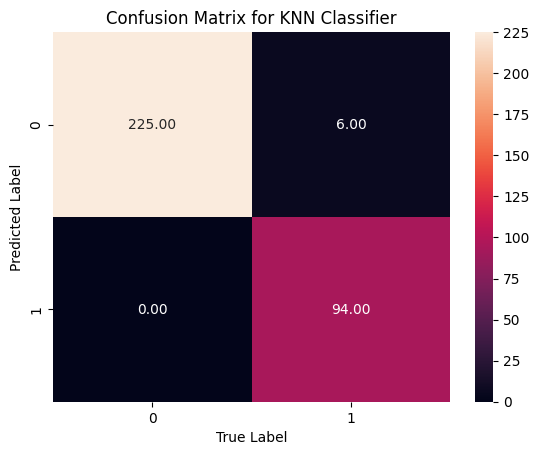

In [41]:
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

**LOGISTIC REGRESSION**

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8861538461538462


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       231
           1       0.81      0.80      0.80        94

    accuracy                           0.89       325
   macro avg       0.86      0.86      0.86       325
weighted avg       0.89      0.89      0.89       325



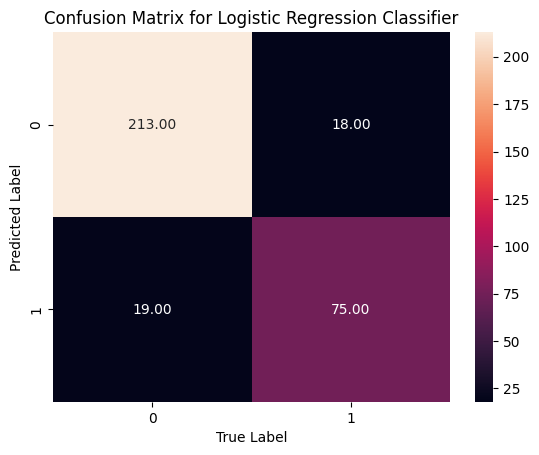

In [44]:
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

**LINEAR REGRESSION**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 0.2598940258708999
MSE: 0.11248614642520702
R^2: 0.4528254022214935


In [46]:
!pip install streamlit pyngrok scikit-learn joblib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.3 MB/s eta 0:00:00
